#   **Multimedia systems course | ECE AUTH | Winter semester 2022**
## **Simplified mp3 CODEC**


>   Giachoudis Christos


>   Kostopoulos Andreas Marios


![ logo](mp3.png)

## Necessary imports

In [65]:
# Importing the necessary libraries, files and modules
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fft
from frame import *
from mp3 import *

## h coefficients import


In [33]:
h_coeffs = np.load('h.npy', allow_pickle=True).tolist()
print(type(h_coeffs))
h_coeffs = h_coeffs['h'].reshape(-1,)
# print(h_coeffs[4])
# print(h_coeffs)
print(len(h_coeffs))

<class 'dict'>
512


## Import `wav` file

In [34]:
samplerate, data = wavfile.read('./myfile.wav')
print(f"WAV file imported successfully!!! This file has been created with a sample rate of {samplerate} Hz.")

WAV file imported successfully!!! This file has been created with a sample rate of 44100 Hz.


In [35]:
# just for testing | at the end we can delete it
print(f"We will work with {type(data)}")

We will work with <class 'numpy.ndarray'>


## **Coder - Decoder**

### 1) Subband filtering

1.1: `H and G computation`

In [36]:
h = h_coeffs # the standard h coefficients
M = 32 # number of filters
H = make_mp3_analysisfb(h, M) # subband filtering analysis coefficients computation
G = make_mp3_synthesisfb(h, M) # subband filtering synthesis coefficients computation

1.2: `Hs plotting on f frequency(Hz)`

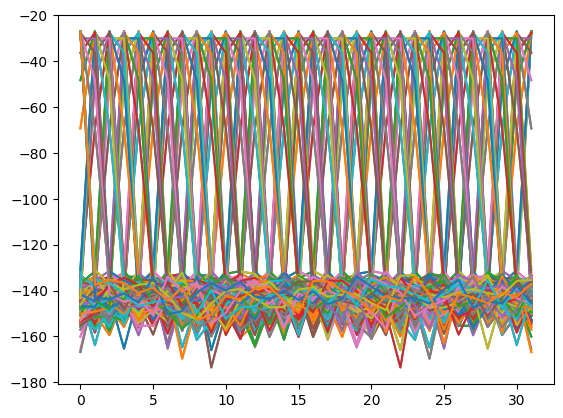

In [102]:
# frequency (Hz)
# f = np.arange(0, 23000)
Hs = np.transpose(H)
fft_h = fft.fft(Hs, n = 512, norm = 'ortho')
fft_h_db = 10*np.log10((np.abs(fft_h))**2)
plt.plot(fft_h_db)
plt.show()

1.3: `Hs plotting on z frequency(barks)`

1.4: `codec0`

1.5: `coder0`

1.6: `decoder0`

1.7: `Coding/Decoding`